In [1]:
import pandas as pd

train_data_path = 'train_houseprice.csv'
test_data_path = 'test_houseprice.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

C:\Users\Sruthika Chezhian\AppData\Local\Temp\ipykernel_28448\1033289217.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Select required columns from the training dataset as given in the task
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
train_df_selected = train_df[features]

In [5]:
train_df_selected.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [6]:
train_df_selected.describe()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


In [7]:
train_df_selected.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

In [8]:
missing_values = train_df_selected.isnull().sum()

train_df_selected.describe(), missing_values

(         GrLivArea  BedroomAbvGr     FullBath      SalePrice
 count  1460.000000   1460.000000  1460.000000    1460.000000
 mean   1515.463699      2.866438     1.565068  180921.195890
 std     525.480383      0.815778     0.550916   79442.502883
 min     334.000000      0.000000     0.000000   34900.000000
 25%    1129.500000      2.000000     1.000000  129975.000000
 50%    1464.000000      3.000000     2.000000  163000.000000
 75%    1776.750000      3.000000     2.000000  214000.000000
 max    5642.000000      8.000000     3.000000  755000.000000,
 GrLivArea       0
 BedroomAbvGr    0
 FullBath        0
 SalePrice       0
 dtype: int64)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

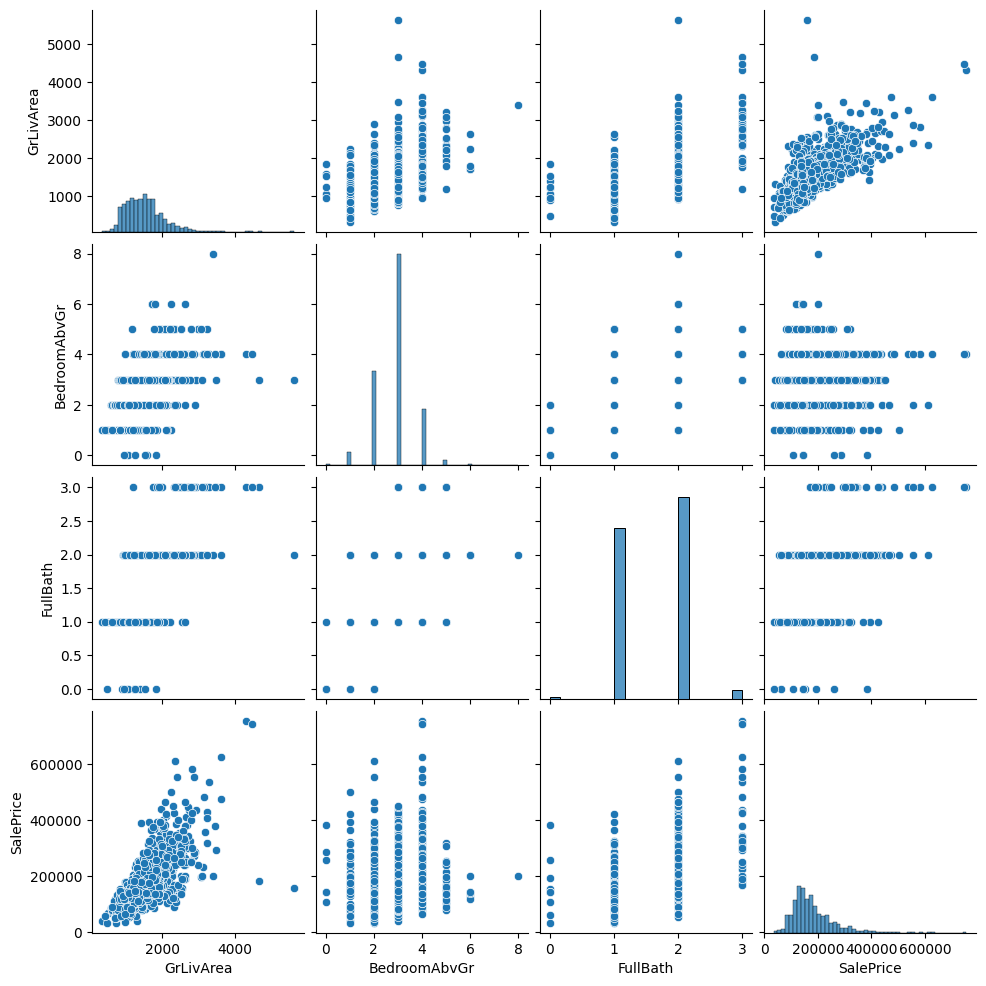

In [10]:
sns.pairplot(train_df_selected)
plt.show()

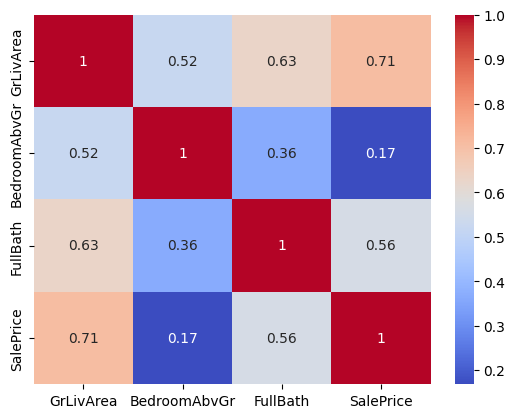

In [11]:
sns.heatmap(train_df_selected.corr(), annot = True, cmap="coolwarm")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = train_df_selected[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train_df_selected['SalePrice']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.6341189942328371

In [18]:
test_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
test_df_selected = test_df[test_features]

test_df_selected.isnull().sum()

for feature in test_features:
    if test_df_selected[feature].isnull().any():
        test_df_selected[feature].fillna(train_df_selected[feature].median(), inplace=True)

test_predictions = model.predict(test_df_selected)

predictions_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

predictions_df.to_csv('house_price_predictions.csv', index=False)

Text(0, 0.5, 'y_pred')

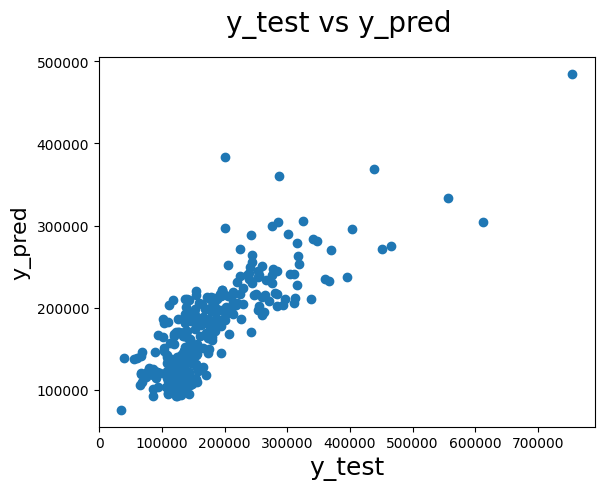

In [19]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)    

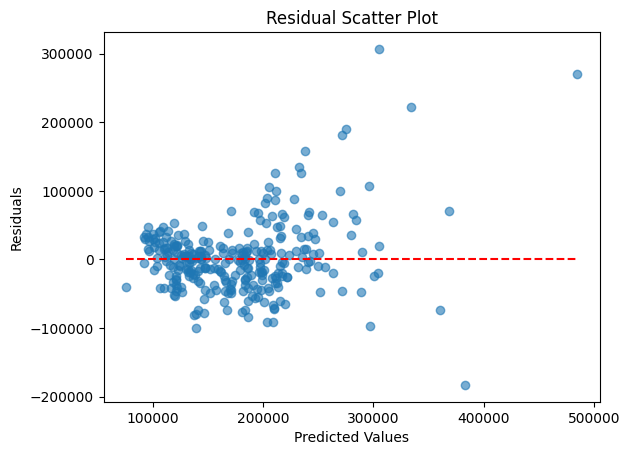

In [21]:
residuals = y_test - y_pred

# Create the residual scatter plot
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Scatter Plot')
plt.show()
